# COGS 108 - Data Checkpoint

## Authors
Tony Chen: Background research, Writing - review & editing, Experimental investigation
Toby Jacob: Background research, Writing - original draft
Andrew Liang: Analysis, Conceptualization, Visualization
Celine Nguyen: Background research, Software, Methodology
Shivam Sharma: Background research, Software, Project administration

## Research Question

Is there a statistically significant difference in the average CGPA of university students who report sleeping 7+ hours per night compared to those who report sleeping fewer than 7 hours?


## Background and Prior Work

The relationship between sleep hygiene and academic success is a cornerstone of student health research. 
University students often experience a "sleep debt" due to high cognitive demands and the biological 
tendency for delayed sleep phases in young adults. Research indicates that sleep is not merely a passive 
state of rest but an active period for memory consolidation, where the hippocampus and neocortex interact 
to solidify information acquired during the day.<a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1) 
When students drop below the recommended threshold of rest, they risk impairing executive functions, 
including attention span and decision-making capabilities, which are vital for maintaining a high CGPA.

The American Academy of Sleep Medicine emphasizes that for college students, getting enough sleep is vital for academic success, noting that sleep-deprived students are more likely to experience lower grades and a decrease in overall performance.<a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2)While many students prioritize "all-nighter" study sessions, data consistently shows that consistent, long-duration sleep provides a much stronger foundation for long-term retention and academic endurance.

Furthermore, large-scale longitudinal studies have demonstrated that sleep quality, duration, and consistency are all significantly related to academic performance in college. Specifically, students who maintain a regular sleep schedule and average over seven hours of rest tend to have significantly higher GPAs than those with irregular or short-duration sleep patterns.<a name="cite_ref-3"></a>[<sup>3</sup>](#cite_note-3)  This suggests that the quality and quantity of rest may be a more powerful predictor of success than the sheer volume of study hours completed.

By utilizing Exploratory Data Analysis on student lifestyle data, we aim to verify if a 7-hour threshold results in a statistically significant difference in CGPA. Organizations like the Sleep Foundation have historically tracked how sleep affects school reports, providing a baseline that suggests a clear drop-off in academic metrics when students fall into the "insufficient sleep" category.<a name="cite_ref-4"></a>[<sup>4</sup>](#cite_note-4)  Our project builds on this by specifically isolating the 7-hour variable to provide an unambiguous answer to how rest influences academic standing.

References

1. <a name="cite_note-1"></a> [^](#cite_ref-1) Okano, K., Kaczmarzyk, J.R., Dave, N. et al. (2019). 
   Sleep quality, duration, and consistency are associated with better academic performance in college students. 
   npj Science of Learning.  
   https://www.nature.com/articles/s41539-019-0055-z

2. <a name="cite_note-2"></a> [^](#cite_ref-2) American Academy of Sleep Medicine. (2017). 
   College students: Getting enough sleep is vital to academic success.  
   https://aasm.org/college-students-getting-enough-sleep-is-vital-to-academic-success/

3. <a name="cite_note-3"></a> [^](#cite_ref-3) Maheshwari, G., & Shaukat, F. (2019). 
   Impact of poor sleep quality on the academic performance of medical students. 
   Cureus.  
   https://pmc.ncbi.nlm.nih.gov/articles/PMC7381801/

4. <a name="cite_note-4"></a> [^](#cite_ref-4) National Sleep Foundation. (2023). 
   Sleep and School Performance.  
   https://www.sleepfoundation.org/children-and-sleep/sleep-and-school-performance



## Hypothesis


We predict that there will be a **large, statistically significant, and positive** difference in the average CGPA of university students who report sleeping 7+ hours per night compared to the average CGPA of university students who report sleeping less than 7 hours per night. We believe that students who have more sleep will likely be more alert in the classes they take, and as a result will receive higher scores on homework assignments and exams, on average. This means we would expect their CGPAs to be greater compared to students who sleep less.

## Data

### Data overview
- Dataset #1
  - Dataset Name: CMU Sleep
  - Link to the dataset: https://www.kaggle.com/datasets/mexwell/cmu-sleep
  - Number of observations: 634 observations
  - Number of variables: 15 variables
      - `Zterm_units_ZofZ`: the standardized number of units a student is enrolled in for a term
      - `cum_gpa`: the cumulative GPA for a student
      - `term_gpa`: the end-of-term GPA for a student
      - `bedtime_mssd`: describes the day-to-day variability of bedtime by taking the average squared deviation of each bedtime in succession
      - `TotalSleepTime`: measures the number of minutes slept during the main sleep period
      - `daytime_sleep`: measures the number of minutes slept outside the main sleep period (e.g., naps or accidentally falling asleep in class)
  - The dataset doesn't directly have a variable indicating whether an individual's average period of sleep exceeded 7 hours. We can easily create that during the data cleaning phase, however.

In [ ]:
# Run this code every time when you're actively developing modules in .py files.  It's not needed if you aren't making modules
#
## this code is necessary for making sure that any modules we load are updated here 
## when their source code .py files are modified

%load_ext autoreload
%autoreload 2

In [32]:
# Setup code -- this only needs to be run once after cloning the repo!
# this code downloads the data from its source to the `data/00-raw/` directory
# if the data hasn't updated you don't need to do this again!

# if you don't already have these packages (you should!) uncomment this line
# %pip install requests tqdm

import sys
sys.path.append('./modules') # this tells python where to look for modules to import

import get_data # this is where we get the function we need to download data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy import stats

# replace the urls and filenames in this list with your actual datafiles
# yes you can use Google drive share links or whatever
# format is a list of dictionaries; 
# each dict has keys of 
#   'url' where the resource is located
#   'filename' for the local filename where it will be stored 
datafiles = [
    { 'url': 'https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/airline-safety/airline-safety.csv', 'filename':'airline-safety.csv'},
    { 'url': 'https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/bad-drivers/bad-drivers.csv', 'filename':'bad-drivers.csv'}
]

get_data.get_raw(datafiles,destination_directory='data/00-raw/')

Overall Download Progress:  50%|█████     | 1/2 [00:00<00:00,  5.61it/s]   

Successfully downloaded: airline-safety.csv



Overall Download Progress: 100%|██████████| 2/2 [00:00<00:00,  6.41it/s]

Successfully downloaded: bad-drivers.csv


In [33]:
!pip install kaggle
import os
os.environ['KAGGLE_API_TOKEN'] = 'KGAT_977aabdb31de08a2b7de9eac6fe3e4b3'
!/home/shs077/.local/bin/kaggle competitions list
os.environ['PATH'] += ':/home/shs077/.local/bin'
!kaggle competitions list
!/home/shs077/.local/bin/kaggle kernels pull m1z2n3r4a5/sleep-duration-vs-gpa-statistical-analysis-vis
!/home/shs077/.local/bin/kaggle datasets download -d mexwell/cmu-sleep --unzip
cmu_sleep = pd.read_csv('cmu-sleep.csv')
cmu_sleep

Defaulting to user installation because normal site-packages is not writeable
ref                                                                              deadline             category          reward  teamCount  userHasEntered  
-------------------------------------------------------------------------------  -------------------  ---------  -------------  ---------  --------------  
https://www.kaggle.com/competitions/ai-mathematical-olympiad-progress-prize-3    2026-04-15 23:59:00  Featured   2,207,152 Usd       2392           False  
https://www.kaggle.com/competitions/passenger-screening-algorithm-challenge      2017-12-15 23:59:00  Featured   1,500,000 Usd        518           False  
https://www.kaggle.com/competitions/zillow-prize-1                               2018-01-10 15:59:00  Featured   1,200,000 Usd       3770           False  
https://www.kaggle.com/competitions/data-science-bowl-2017                       2017-04-12 23:59:00  Featured   1,000,000 Usd       1972     

,subject_id,study,cohort,demo_race,demo_gender,demo_firstgen,bedtime_mssd,TotalSleepTime,midpoint_sleep,frac_nights_with_data,daytime_sleep,cum_gpa,term_gpa,term_units,Zterm_units_ZofZ
0,185,5,lac1,1,1,0,0.116727,432.200000,458.660000,0.862069,24.160000,3.000000,3.380000,73,4.055294859
1,158,5,lac1,0,1,0,0.141681,391.931035,364.465517,1.000000,13.137931,3.660000,2.600000,64,2.482534122
2,209,5,lac1,1,1,0,1.529289,344.304348,560.891304,0.793103,14.956522,3.570000,3.070000,63,2.30778293
3,102,5,lac1,0,1,1,0.130148,392.620690,416.482759,1.000000,54.551724,3.610000,3.560000,61,1.958280544
4,174,5,lac1,1,1,0,0.130181,423.421053,368.763158,0.655172,10.526316,3.210000,4.000000,61,1.958280544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629,99978,4,nh,0,0,0,0.091325,383.448276,407.931035,0.966667,44.344828,3.722167,3.611333,,
630,61,2,uw1,0,1,,0.045369,477.894737,331.315789,0.678571,23.631579,3.868182,3.650000,10,-1.80457982
631,172,2,uw1,1,1,,0.075429,407.153846,387.269231,0.928571,12.384615,3.727272,3.600000,15,0.373361342
632,110,2,uw1,1,0,,0.200289,397.125000,487.583333,0.857143,99.541667,3.337500,3.538461,13,-0.497815123


### CMU Student Sleep and Academic Performance Dataset
The CMU dataset contains data collected from Fitbits about Carnegie Mellon University students' sleep habits and academic performances. Each row represents one student during one academic term. The dataset compares sleep habits to the students' GPAs. 
- The important metrics are:
    - `Zterm_units_ZofZ`: The standaradized Z-score changes these course loads from the term_units variable releative to the student's peers.
    - `cum_gpa`: Cumulative GPA represents the student's overall academic standing throughout their academic history. This is measured on a 0.0 to 4.0 scale.
    - `term_gpa`: Term GPA represents the student's overall performance during a specific semester. This is measured on a 0.0 to 4.0 scale.
    - `bedtime_mssd`: Measured in square hours. This represents the variability in the students' bedtimes across nights. The larger the value, the more irregular the sleep timing. The higher the variability, the worse cognitive performance and mood regulation there is among students.
    - `TotalSleepTime`: Measured in minutes per night. Represents the total average time each student sleeps during the night in the term. Values that are below 360 minutes show short sleep which is connected with low cognitive performance, mood regulation, and poorer academic performances as well.
    - `daytime_sleep`: Measured in minutes per day. Represents the time spent sleeping in the day/napping. High daytime sleep can imply bad nighttime sleep, while moderate daytime sleep can make up for bad nighttime sleep.

Some conserns with the dataset is that the sample consists only of students who agreed to participate in a month-long Fitbit study. When they consent to this they may be biased to be more conscious about their choices regarding health and academic motivation which would be self-selection. This can result in a skew from what the average first-year student would be. Another concern is that the Fitbit used to collect the data are not the most highly graded scientific measuring tool which means that there can be slight miscalculations with the duration of sleep per individual. This is also backed by the data point frac_nights_with_data which indicates missing or incomplete data from the Fitbits dying or not being worn.

Dataset successfully loaded with 634 rows.
Original size: (634, 15)

Missing values detected:
 term_units    147
dtype: int64

Number of flagged outliers (extreme GPA or Sleep): 14

Final wrangled data saved to 'data/02-processed/'.
--- Welch's T-Test Results ---
T-statistic: 2.1024
P-value: 3.6107e-02
Result: Significant difference


/tmp/ipykernel_425/1814862729.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sleep_group', y='cum_gpa', data=cmu_sleep, palette='Set2')


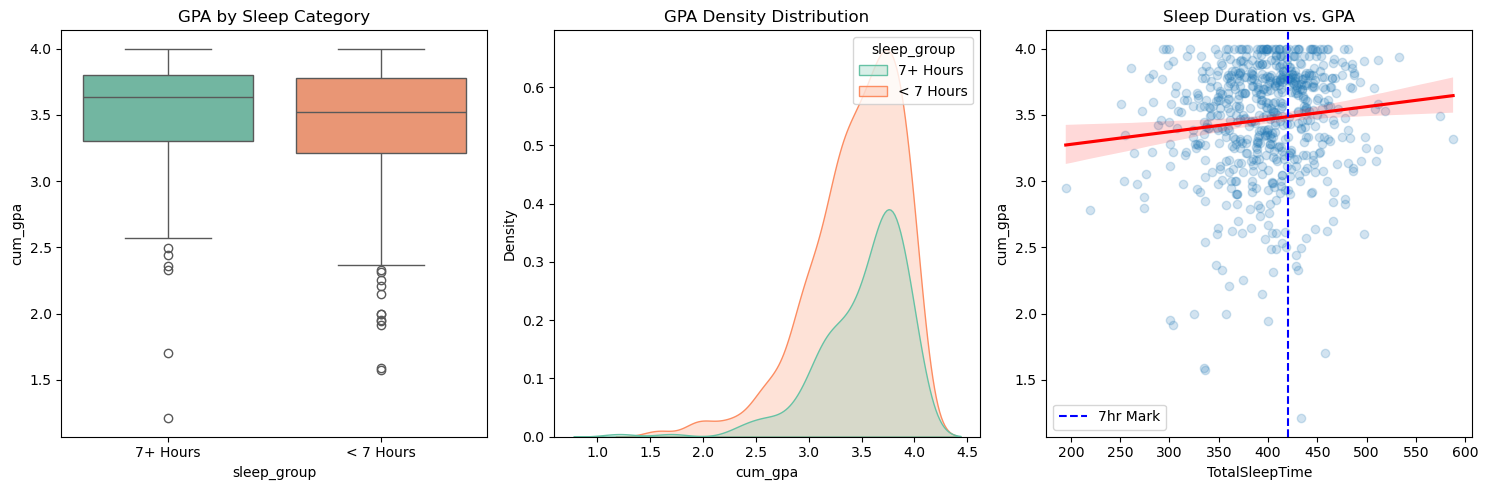


--- Summary Statistics ---
             count      mean       std    median
sleep_group                                     
7+ Hours       206  3.517236  0.422110  3.635584
< 7 Hours      428  3.440741  0.443171  3.524428


In [35]:
## YOUR CODE TO LOAD/CLEAN/TIDY/WRANGLE THE DATA GOES HERE
# 1. Setup the required directory structure
folders = ['data/00-raw', 'data/01-interim', 'data/02-processed']
for folder in folders:
    os.makedirs(folder, exist_ok=True)

# 2. Load the raw data
if os.path.exists('cmu-sleep.csv'):
    shutil.copy('cmu-sleep.csv', 'data/00-raw/cmu-sleep.csv')
    
cmu_sleep = pd.read_csv('data/00-raw/cmu-sleep.csv')

print(f"Dataset successfully loaded with {cmu_sleep.shape[0]} rows.")
cmu_sleep.head()

# 1. Size of the dataset
print(f"Original size: {cmu_sleep.shape}")

# 2. Tidiness Check
# The data is already 'tidy': each row is a student (observation), 
# each column is a variable, and each cell is a single value.

# 3. Missing Data Analysis
# Coerce numeric columns to find hidden missing strings (like 'N/A')
cmu_sleep['term_units'] = pd.to_numeric(cmu_sleep['term_units'], errors='coerce')
missing_vals = cmu_sleep.isnull().sum()
print("\nMissing values detected:\n", missing_vals[missing_vals > 0])

# Justification: We will KEEP these rows. The missingness is in 'term_units', 
# but our primary variables (GPA and Sleep) are 100% complete.

# 4. Outlier Detection (Z-score > 3)
cmu_sleep['gpa_z'] = (cmu_sleep['cum_gpa'] - cmu_sleep['cum_gpa'].mean()) / cmu_sleep['cum_gpa'].std()
cmu_sleep['sleep_z'] = (cmu_sleep['TotalSleepTime'] - cmu_sleep['TotalSleepTime'].mean()) / cmu_sleep['TotalSleepTime'].std()
outliers = cmu_sleep[(cmu_sleep['gpa_z'].abs() > 3) | (cmu_sleep['sleep_z'].abs() > 3)]
print(f"\nNumber of flagged outliers (extreme GPA or Sleep): {len(outliers)}")

# 5. Cleaning and Final Wrangling
# Create the binary category for the Research Question: 7 hours = 420 minutes
cmu_sleep['sleep_group'] = np.where(cmu_sleep['TotalSleepTime'] >= 420, '7+ Hours', '< 7 Hours')
# Save processed version
cmu_sleep.to_csv('data/02-processed/cmu_sleep_cleaned.csv', index=False)
print("\nFinal wrangled data saved to 'data/02-processed/'.")

# --- 1. HYPOTHESIS TEST (Welch's T-Test) ---
group_high = cmu_sleep[cmu_sleep['sleep_group'] == '7+ Hours']['cum_gpa']
group_low = cmu_sleep[cmu_sleep['sleep_group'] == '< 7 Hours']['cum_gpa']
t_stat, p_val = stats.ttest_ind(group_high, group_low, equal_var=False)
print("--- Welch's T-Test Results ---")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4e}")
print("Result:", "Significant difference" if p_val < 0.05 else "No significant difference")

# --- 2. VISUALIZATIONS ---
plt.figure(figsize=(15, 5))
# Plot A: Boxplot of GPA by Sleep Category
plt.subplot(1, 3, 1)
sns.boxplot(x='sleep_group', y='cum_gpa', data=cmu_sleep, palette='Set2')
plt.title('GPA by Sleep Category')
# Plot B: Distribution of GPA
plt.subplot(1, 3, 2)
sns.kdeplot(data=cmu_sleep, x='cum_gpa', hue='sleep_group', fill=True, palette='Set2')
plt.title('GPA Density Distribution')
# Plot C: Scatter Plot with Regression
plt.subplot(1, 3, 3)
sns.regplot(x='TotalSleepTime', y='cum_gpa', data=cmu_sleep, 
            scatter_kws={'alpha':0.2}, line_kws={'color':'red'})
plt.axvline(420, color='blue', linestyle='--', label='7hr Mark')
plt.title('Sleep Duration vs. GPA')
plt.legend()
plt.tight_layout()
plt.show()
# --- 3. SUMMARY STATISTICS ---
print("\n--- Summary Statistics ---")
print(cmu_sleep.groupby('sleep_group')['cum_gpa'].agg(['count', 'mean', 'std', 'median']))

## Ethics

### A. Data Collection
 - [X] **A.1 Informed consent**: If there are human subjects, have they given informed consent, where subjects affirmatively opt-in and have a clear understanding of the data uses to which they consent?

> If we use a public dataset, the data will be anonymized. Participants who choose to share their data will have the option to opt out or choose to keep their information anonymous.

 - [X] **A.2 Collection bias**: Have we considered sources of bias that could be introduced during data collection and survey design and taken steps to mitigate those?

> We have considered certain sources of bias like asking certain majors with more rigorous classes. To mitigate these, we will ask a variety of people and get a diverse group of responses. 

 - [X] **A.3 Limit PII exposure**: Have we considered ways to minimize exposure of personally identifiable information (PII) for example through anonymization or not collecting information that isn't relevant for analysis?

> We will not collect information not relevant to analysis, such as names, student PIDs, or any contact information.

 - [ ] **A.4 Downstream bias mitigation**: Have we considered ways to enable testing downstream results for biased outcomes (e.g., collecting data on protected group status like race or gender)?

### B. Data Storage
 - [X] **B.1 Data security**: Do we have a plan to protect and secure data (e.g., encryption at rest and in transit, access controls on internal users and third parties, access logs, and up-to-date software)?

> The data will be stored locally on password-protected devices, which are only to be accessed by our group. No personal information will be stored, which will reduce security risks.

 - [ ] **B.2 Right to be forgotten**: Do we have a mechanism through which an individual can request their personal information be removed?

 - [X] **B.3 Data retention plan**: Is there a schedule or plan to delete the data after it is no longer needed?

> The dataset will only be used for the project and will be deleted afterward.

### C. Analysis
 - [X] **C.1 Missing perspectives**: Have we sought to address blindspots in the analysis through engagement with relevant stakeholders (e.g., checking assumptions and discussing implications with affected communities and subject matter experts)?

> We know the blindspots that exist within our dataset, which will be discussed in the discussion section.

 - [X] **C.2 Dataset bias**: Have we examined the data for possible sources of bias and taken steps to mitigate or address these biases (e.g., stereotype perpetuation, confirmation bias, imbalanced classes, or omitted confounding variables)?

> We will examine the dataset for imbalances in sleep categories that are caused by certain variables not addressed in the data.

 - [X] **C.3 Honest representation**: Are our visualizations, summary statistics, and reports designed to honestly represent the underlying data?

> The visualizations, summary statistics, and reports designed will honestly represent the underlying data. We will choose accurate representations to avoid invalid interpretations. 

 - [X] **C.4 Privacy in analysis**: Have we ensured that data with PII are not used or displayed unless necessary for the analysis?

> No PII will be displayed in the project.

 - [X] **C.5 Auditability**: Is the process of generating the analysis well documented and reproducible if we discover issues in the future?

> We will keep a separate notebook to allow the results to be reproducible if we come across issues.

### D. Modeling
 - [X] **D.1 Proxy discrimination**: Have we ensured that the model does not rely on variables or proxies for variables that are unfairly discriminatory?

> We will not use variables that act as proxies that are unfairly discriminatory when modeling our project.

 - [X] **D.2 Fairness across groups**: Have we tested model results for fairness with respect to different affected groups (e.g., tested for disparate error rates)?

> We acknowledge that the results may not be perfectly equal for all students due to unobserved variables. 

 - [X] **D.3 Metric selection**: Have we considered the effects of optimizing for our defined metrics and considered additional metrics?

> We will not rely on a single metric for our project.

 - [X] **D.4 Explainability**: Can we explain in understandable terms a decision the model made in cases where a justification is needed?

> We use simple statistical methods that are easy to understand. This will make it easy to understand our results.

 - [X] **D.5 Communicate limitations**: Have we communicated the shortcomings, limitations, and biases of the model to relevant stakeholders in ways that can be generally understood?

> We clearly explain the limitations of our analysis, including the use of self-reported data and possibility of factors that affect CGPA.

### E. Deployment
 - [ ] **E.1 Monitoring and evaluation**: Do we have a clear plan to monitor the model and its impacts after it is deployed (e.g., performance monitoring, regular audit of sample predictions, human review of high-stakes decisions, reviewing downstream impacts of errors or low-confidence decisions, testing for concept drift)?
 - [ ] **E.2 Redress**: Have we discussed with our organization a plan for response if users are harmed by the results (e.g., how does the data science team evaluate these cases and update analysis and models to prevent future harm)?
 - [ ] **E.3 Roll back**: Is there a way to turn off or roll back the model in production if necessary?
 - [ ] **E.4 Unintended use**: Have we taken steps to identify and prevent unintended uses and abuse of the model and do we have a plan to monitor these once the model is deployed?


## Team Expectations 

* *Communicate all dataset and code changes through the group made on Discord*
* *Try to meet at least once a week to ensure that we don't feel stressed or rushed when it comes to deadlines*
* *Try to have blunt feedback that ensures we are not being mean to each other, but we have proper constructive feedback*
* *We will talk through next steps at the end of every meeting to ensure everyone knows exactly what they are responsible for before the next sync.*
* *If a conflict arises, we will first attempt to resolve it during a scheduled meeting using the "I statement" approach. If a teammate consistently fails to meet agreed-upon deadlines, we will send a formal written warning via email. If no improvement is seen within one week, we will contact the professor/TA as per the COGS 108 policy.*
* *Have effective communication every day by saying what changes we have made daily, and show the changes overall*
* *Assign tasks to each other to ensure that work is evenly split, and that no one is doing more work than someone else*
* *Talk through what the next steps are we want to do*
* *Before any code or text is merged into the main branch, at least one other team member must review it for clarity, grammar, and bugs*


## Project Timeline Proposal

The following is a rough outlook of the upcoming weeks. The meeting time was decided based on everyone's free time. 

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 2/4   | 3 PM  | Brainstorm multiple research questions; shortlist 2–3 feasible options; skim 1–2 related papers/datasets  | Finalize research question + scope; confirm deliverables & timeline | 
| 2/11  | 3 PM  |  Deeper background research; identify at least 2 candidate datasets; draft variables of interest + limitations | Choose dataset; discuss ethics, bias, and feasibility; refine proposal | 
| 2/18  | 3 PM  | Clean raw data schema; define inclusion/exclusion rules; plan feature engineering; draft wrangling checklist | Lock data cleaning rules; assign owners (wrangling/EDA/analysis/writing)  |
| 2/25  | 3 PM  | Complete data wrangling v1; produce initial EDA plots/tables; document data issues | Review EDA; decide final preprocessing; refine analysis plan & metrics  |
| 3/4   | 3 PM  | Run preliminary analyses; validate assumptions; draft methods section | Review results; identify missing analyses; set goals for robustness checks |
| 3/11  | 3 PM  | Finalize analyses; draft results, discussion, and limitations; prepare figures/tables| Full project walkthrough; edit narrative & visuals; finalize conclusions |
| 3/18  | 3 PM  |Final QA: formatting, citations, reproducibility checklist; prep submission artifacts | Submit final project + group surveys |